<a href="https://www.kaggle.com/code/samithsachidanandan/boston-house-price-prediction-regression?scriptVersionId=232058176" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')
# Displaying the first 5 rows 
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Basic statistics 
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Preprocessing the Dataset 

In [5]:
# No of null values 
df.isnull().sum().sort_values()

crim       0
zn         0
indus      0
chas       0
nox        0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
rm         5
dtype: int64

In [6]:
df['rm'] = df['rm'].fillna(df['rm'].mean())

## Exploratory Data Analysis 

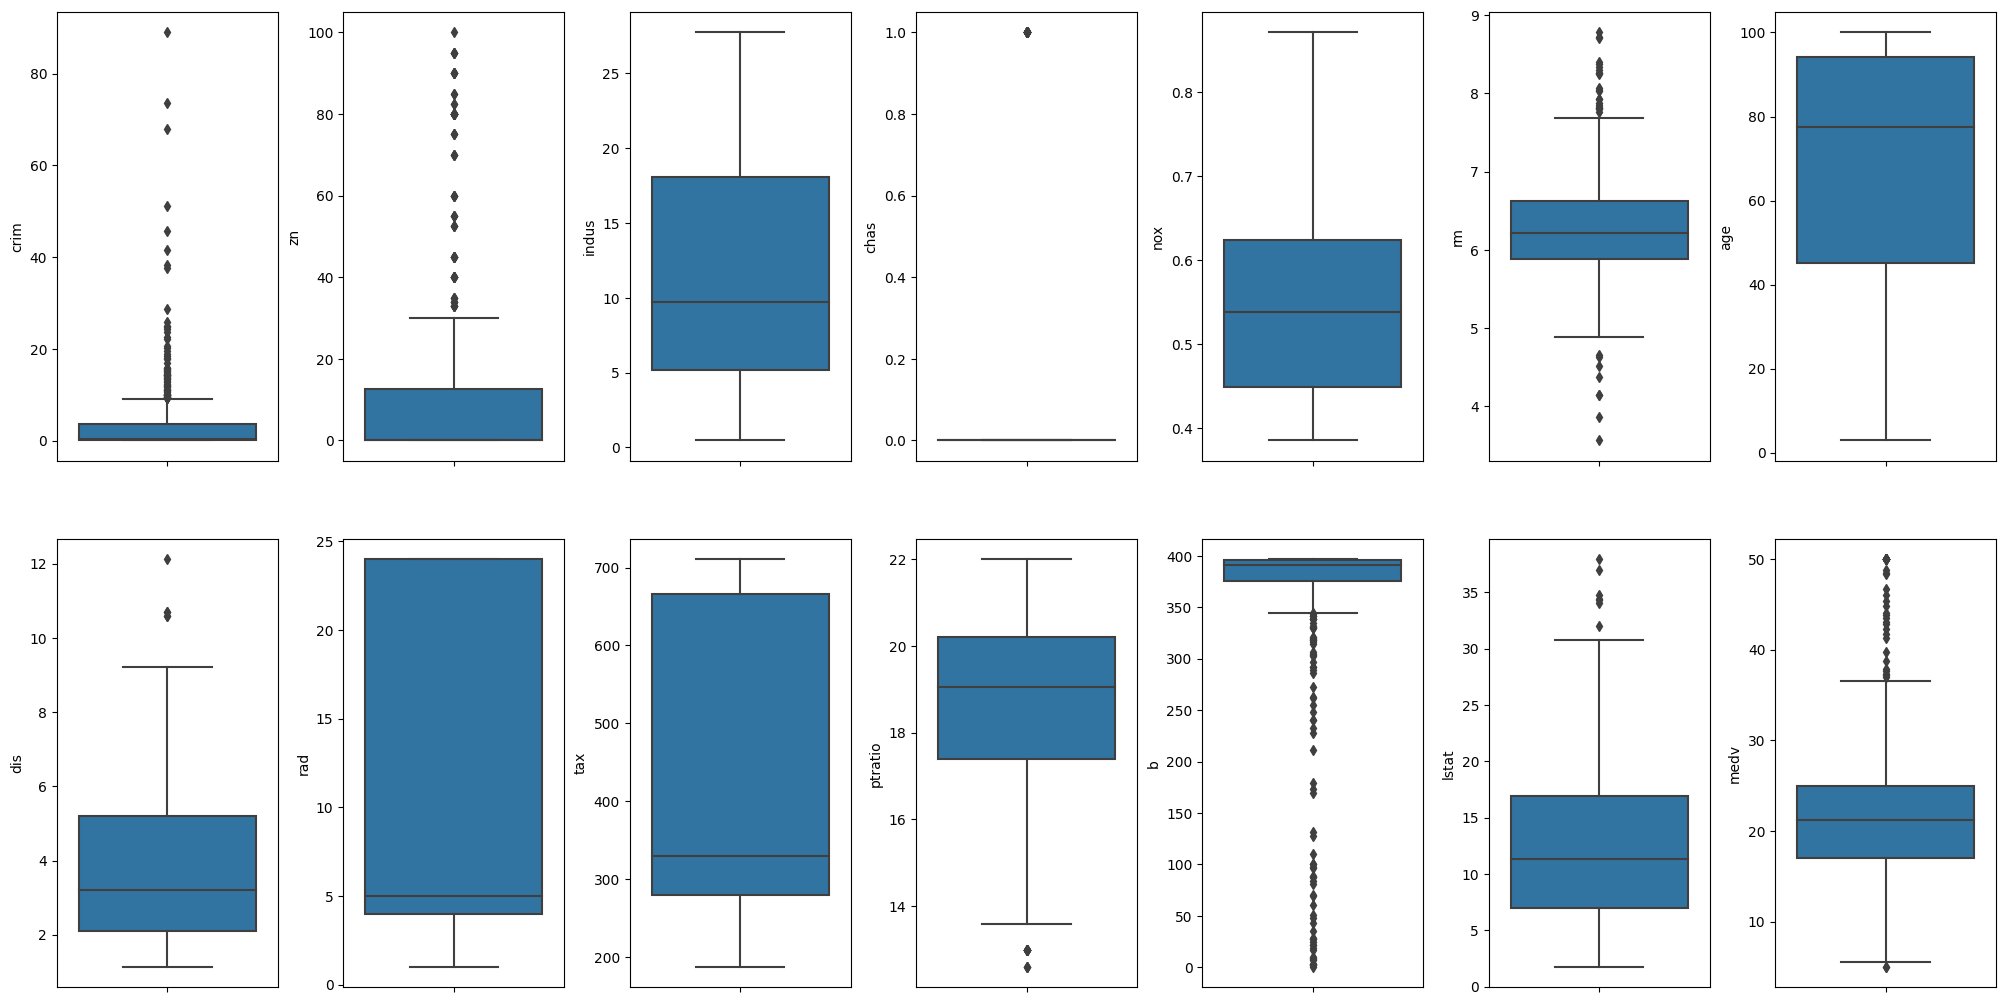

In [7]:
# Creating box plots 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y = col, data=df, ax= ax[index])
    index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad =5.0 )
plt.show()

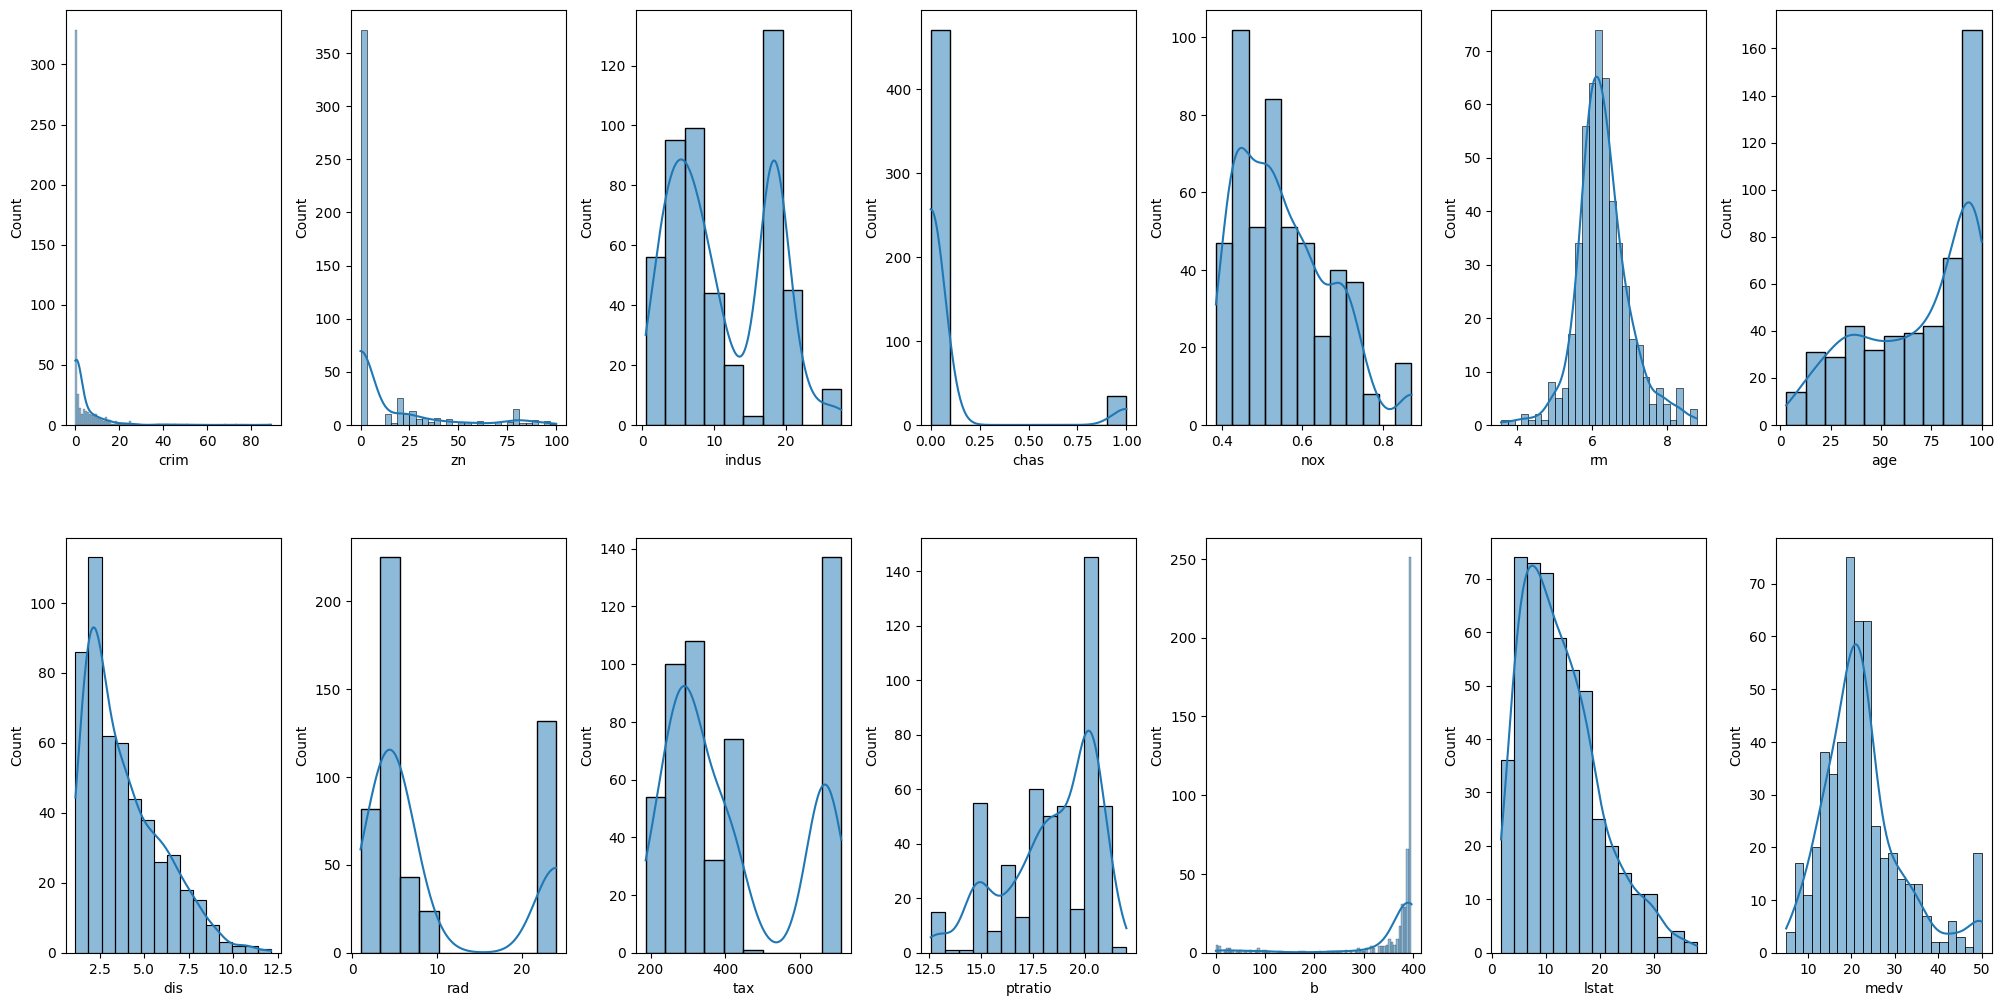

In [8]:
# Creating hist plots 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax= ax[index],kde=True)
    index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad =5.0 )
plt.show()

## Min -Max Normalization 

In [9]:
cols = ['crim', 'zn', 'tax', 'b']
for col in cols: 
    # find the minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/ (maximum-minimum)

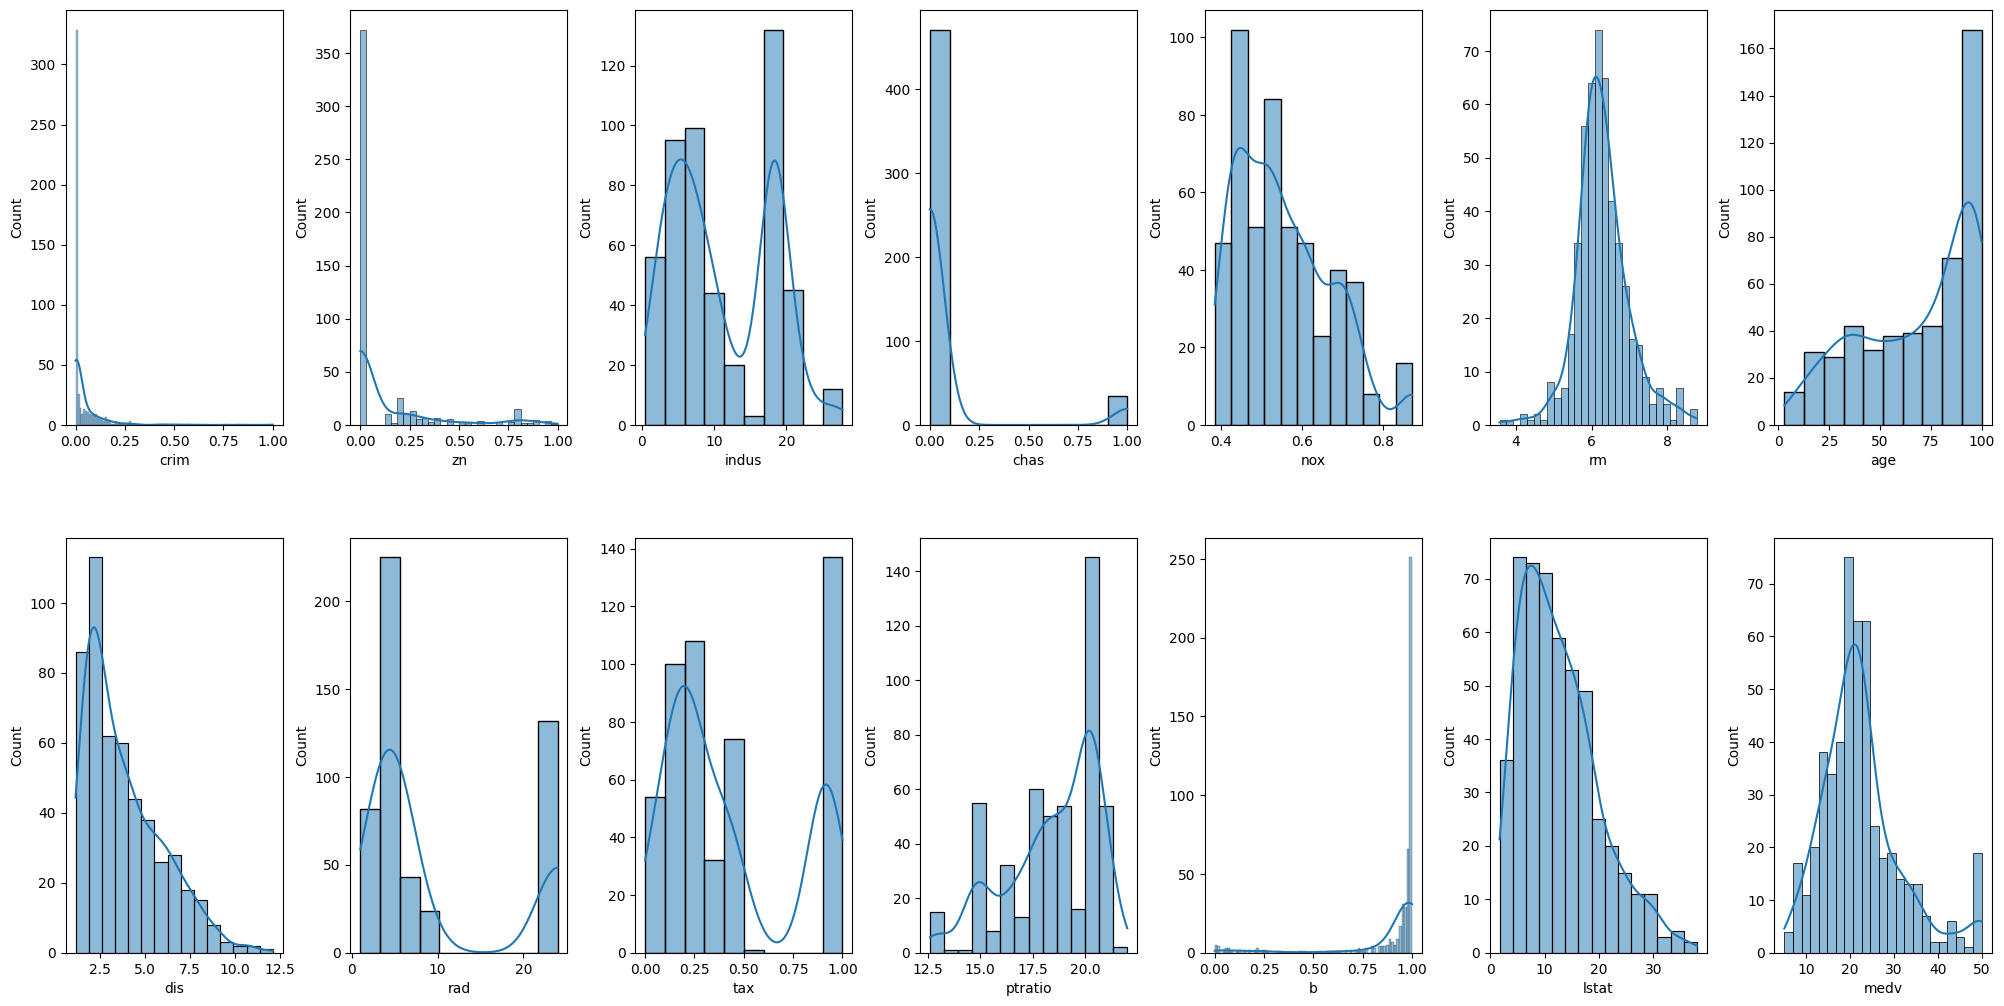

In [10]:
# rerunning hist plots 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax= ax[index],kde=True)
    index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad =5.0 )
plt.show()

In [11]:
#Standardization 
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()

# fit our data 
scaled_cols = scaler.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [12]:
for col in cols:
    df[col] = scaled_cols[col]

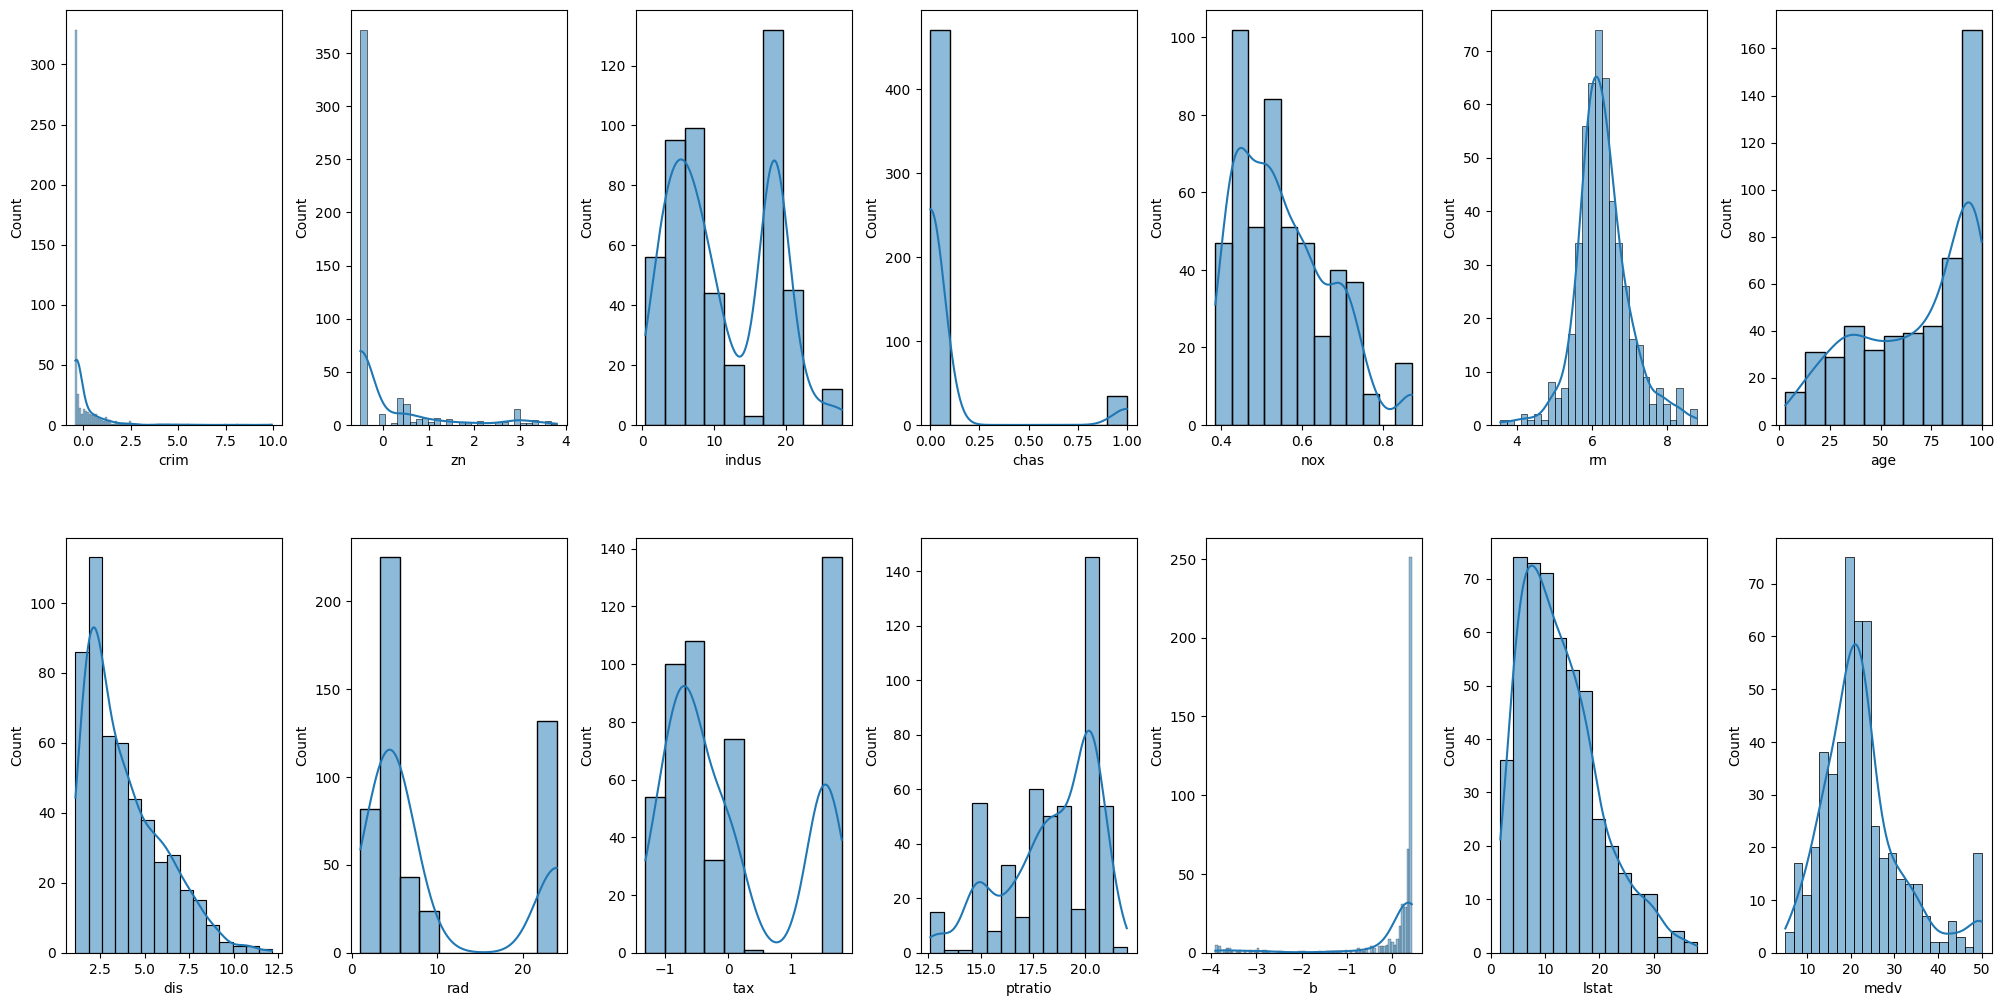

In [13]:
# rerunning hist plots 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax= ax[index],kde=True)
    index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad =5.0 )
plt.show()

## Coorelation Matrix

<Axes: >

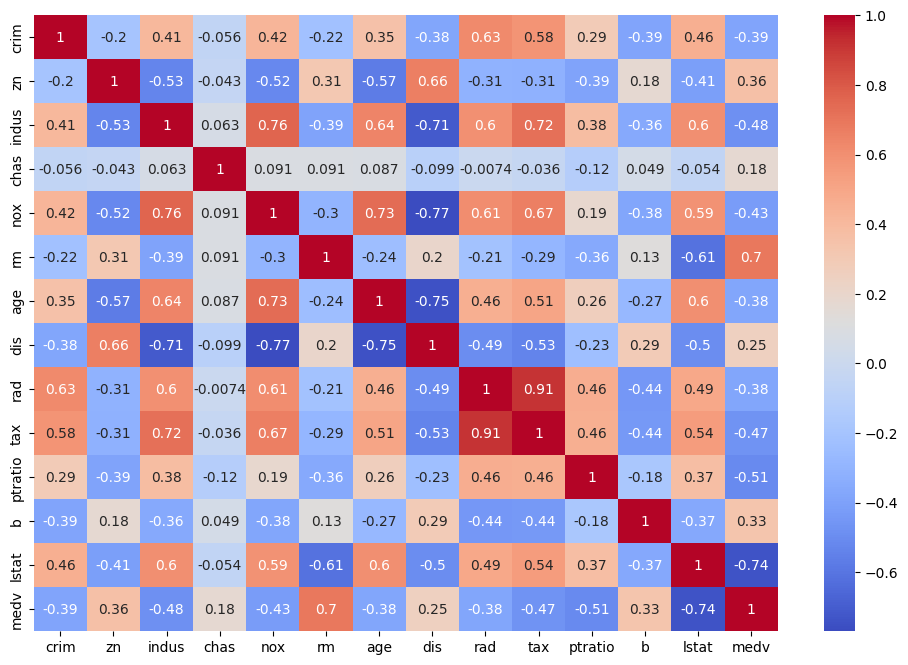

In [14]:
corr = df.corr(numeric_only =True)
plt.figure(figsize= (12,8 ))
sns.heatmap(corr, annot=True,  cmap = 'coolwarm')


<Axes: xlabel='rm', ylabel='medv'>

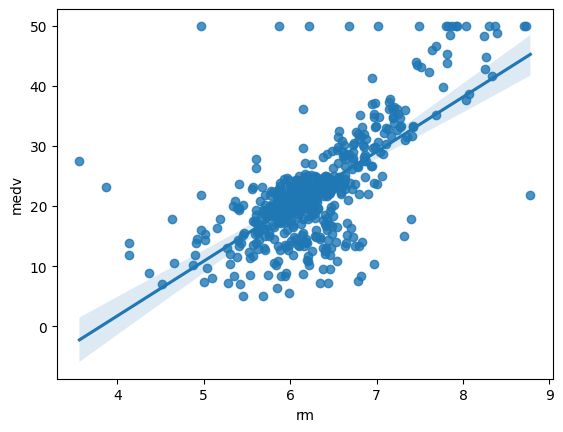

In [15]:
sns.regplot(y=df['medv'], x=df['rm'])

<Axes: xlabel='lstat', ylabel='medv'>

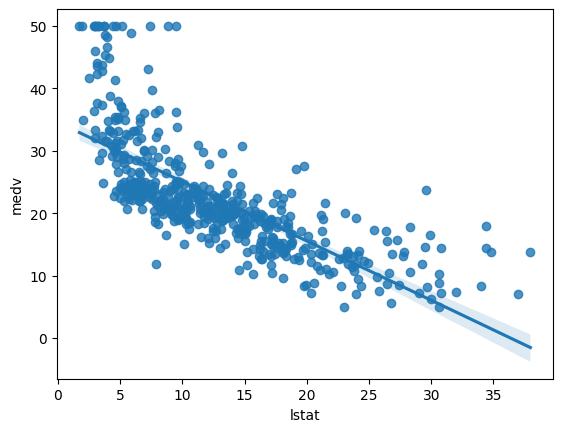

In [16]:
sns.regplot(y=df['medv'], x=df['lstat'])

## Input Split 

In [17]:
X = df.drop(columns = ['medv', 'rad'], axis = 1)
y = df['medv']

In [18]:
X.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # Train the model 
    X_train, X_test, y_train, y_test =train_test_split(X, y, random_state = 42)
    model.fit(X_train, y_train)

    #Predict the training set 
    pred = model.predict(X_test)

    # Perform corss validation 
    cv_score = cross_val_score(model, X, y, scoring= 'neg_mean_squared_error', cv= 5)
    cv_score = np.abs(np.mean(cv_score))

    # Print the results 
    print("Model Reports")
    print("MSE : ", mean_squared_error (y_test, pred) )
    print('CV Score', cv_score)
    

Model Reports
MSE :  24.001840545045766
CV Score 35.695822838868786


<Axes: title={'center': 'Model Coefficients'}>

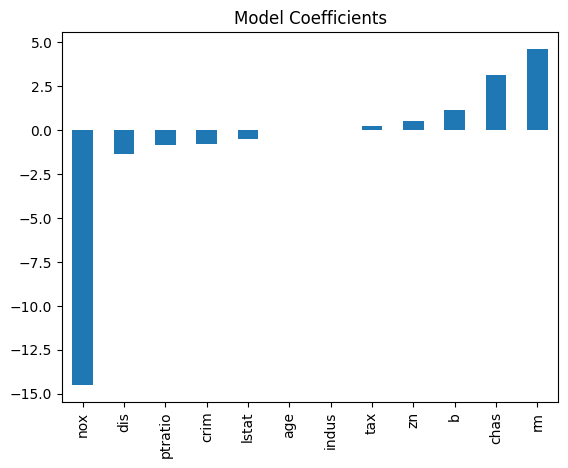

In [20]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
train(model, X,y)
coef= pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficients')

Model Reports
MSE :  10.06472440944882
CV Score 31.988482236458943


<Axes: title={'center': 'Model Feature Importances'}>

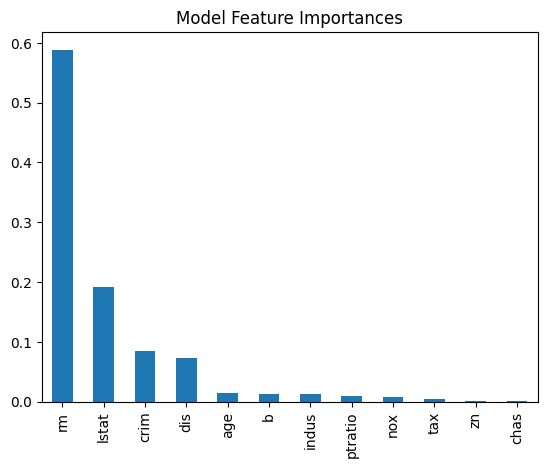

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X,y)
coef= pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind='bar', title = 'Model Feature Importances')

Model Reports
MSE :  10.762896236220472
CV Score 21.895931619316627


<Axes: title={'center': 'Model Feature Importances'}>

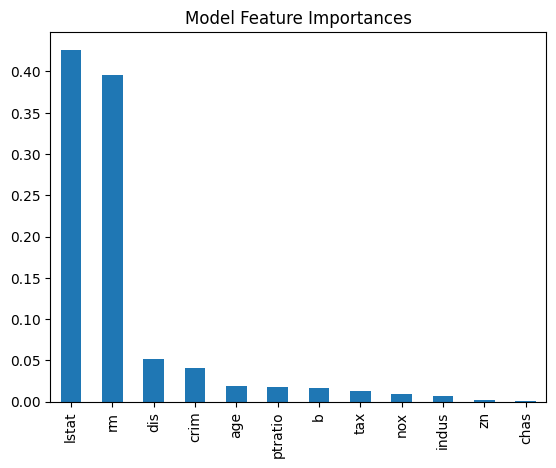

In [22]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()
train(model, X,y)
coef= pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind='bar', title = 'Model Feature Importances')

Model Reports
MSE :  20.169763779527564
CV Score 44.310310619297226


<Axes: title={'center': 'Model Feature Importances'}>

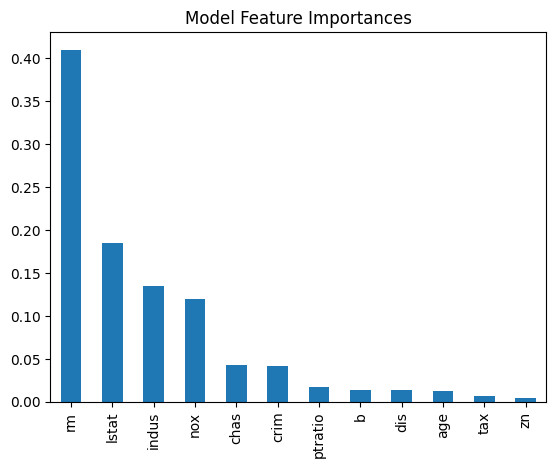

In [23]:
from sklearn.tree import ExtraTreeRegressor

model = ExtraTreeRegressor()
train(model, X,y)
coef= pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind='bar', title = 'Model Feature Importances')

Model Reports
MSE :  9.78757102663496
CV Score 25.936244334802563


<Axes: title={'center': 'Model Feature Importances'}>

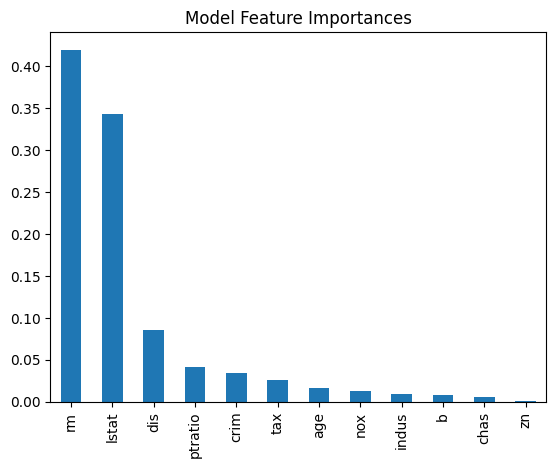

In [24]:
import xgboost as xgb

model = xgb.XGBRegressor()
train(model, X,y)
coef= pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind='bar', title = 'Model Feature Importances')